## 1. Import các thư viện cần thiết

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Đọc và xử lí file dữ liệu

### 2.1. Đọc file dữ liệu

In [2]:
path='orders_1458368.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,tinh_thanhpho,loai_san_pham,thoi_gian,so_tien_thanh_toan,kenh_mua_ban,do_uu_tien,tien_ship,can_nang,chieu_cao,chieu_dai,chieu_rong
0,0,Đà Nẵng,Điện Thoại,02/09/2014 03:02 AM,7951000,Lazada,Trung bình,65000,10.053154,4.608990,3.378163,5.489578
1,1,Bình Định,Thời trang nữ,03/23/2018 11:10 PM,6057000,Offline,Thấp,128000,10.074268,5.352235,4.134053,3.961462
2,2,Hải Dương,Gia Dụng,04/04/2019 10:14 PM,415000,Thegioididong,Thấp,99000,4.066475,2.757206,0.949298,4.151385
3,3,Hải Dương,Máy Ảnh,07/13/2015 06:41 PM,6033000,Shopee,Trung bình,65000,6.836190,2.263171,5.141840,2.708288
4,4,Bình Thuận,Thiết Bị Số,03/06/2020 06:29 AM,2118000,Shopee,Cao,164000,5.691333,1.045574,1.339470,0.923981


In [3]:
df.shape

(1458368, 12)

### 2.2. Loại bỏ cột dư thừa

In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,tinh_thanhpho,loai_san_pham,thoi_gian,so_tien_thanh_toan,kenh_mua_ban,do_uu_tien,tien_ship,can_nang,chieu_cao,chieu_dai,chieu_rong
0,Đà Nẵng,Điện Thoại,02/09/2014 03:02 AM,7951000,Lazada,Trung bình,65000,10.053154,4.608990,3.378163,5.489578
1,Bình Định,Thời trang nữ,03/23/2018 11:10 PM,6057000,Offline,Thấp,128000,10.074268,5.352235,4.134053,3.961462
2,Hải Dương,Gia Dụng,04/04/2019 10:14 PM,415000,Thegioididong,Thấp,99000,4.066475,2.757206,0.949298,4.151385
3,Hải Dương,Máy Ảnh,07/13/2015 06:41 PM,6033000,Shopee,Trung bình,65000,6.836190,2.263171,5.141840,2.708288
4,Bình Thuận,Thiết Bị Số,03/06/2020 06:29 AM,2118000,Shopee,Cao,164000,5.691333,1.045574,1.339470,0.923981


In [5]:
df.shape

(1458368, 11)

### 2.3. Kiểm tra có dữ liệu null hay không để xử lí

In [6]:
print("number of null values:", df.isnull().sum())

number of null values: tinh_thanhpho         0
loai_san_pham         0
thoi_gian             0
so_tien_thanh_toan    0
kenh_mua_ban          0
do_uu_tien            0
tien_ship             0
can_nang              0
chieu_cao             0
chieu_dai             0
chieu_rong            0
dtype: int64


### 2.4. Chọn số lượng rows tối đa mà dataframe hiển thị

In [7]:
pd.set_option('display.max_rows', 300)

### 2.5. Thêm cột 'nam': tách năm từ cột thoi_gian ra để lọc dữ liệu theo năm

In [8]:
year = pd.DatetimeIndex(df['thoi_gian']).year
year

Int64Index([2014, 2018, 2019, 2015, 2020, 2017, 2016, 2018, 2015, 2019,
            ...
            2016, 2017, 2018, 2016, 2017, 2014, 2015, 2014, 2017, 2019],
           dtype='int64', name='thoi_gian', length=1458368)

### 2.6. Nối cột 'nam' và dataframe

In [9]:
series_year = pd.Series(year, name = 'nam')

sub_df = pd.concat([df, series_year], axis=1)
sub_df

,tinh_thanhpho,loai_san_pham,thoi_gian,so_tien_thanh_toan,kenh_mua_ban,do_uu_tien,tien_ship,can_nang,chieu_cao,chieu_dai,chieu_rong,nam
0,Đà Nẵng,Điện Thoại,02/09/2014 03:02 AM,7951000,Lazada,Trung bình,65000,10.053154,4.608990,3.378163,5.489578,2014
1,Bình Định,Thời trang nữ,03/23/2018 11:10 PM,6057000,Offline,Thấp,128000,10.074268,5.352235,4.134053,3.961462,2018
2,Hải Dương,Gia Dụng,04/04/2019 10:14 PM,415000,Thegioididong,Thấp,99000,4.066475,2.757206,0.949298,4.151385,2019
3,Hải Dương,Máy Ảnh,07/13/2015 06:41 PM,6033000,Shopee,Trung bình,65000,6.836190,2.263171,5.141840,2.708288,2015
4,Bình Thuận,Thiết Bị Số,03/06/2020 06:29 AM,2118000,Shopee,Cao,164000,5.691333,1.045574,1.339470,0.923981,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1458363,Thừa Thiên Huế,Laptop,09/14/2014 12:45 AM,8011000,Tiki,Trung bình,127000,6.063137,4.414724,5.231635,3.553635,2014
1458364,Hà Nội,Đồng hồ,10/20/2015 11:10 AM,4143000,Lazada,Cao,83000,3.214458,2.677064,3.969169,1.191648,2015
1458365,Hà Nội,"Thịt, rau củ",06/04/2014 12:01 AM,4515000,Lazada,Trung bình,73000,8.897251,2.410393,4.716571,4.506518,2014
1458366,Quảng Ninh,Nhà Cửa,01/19/2017 04:19 PM,7215000,Tiki,Trung bình,42000,0.866502,2.826060,3.932318,3.245314,2017


### 2.7. Kiểm tra tổng số lượng đơn hàng mỗi năm

In [10]:
df_nam = sub_df['nam'].value_counts().to_frame()
df_nam = df_nam.reset_index()
df_nam = df_nam.rename(columns={'index':'nam', 'nam':'soluong'})
df_nam = df_nam.sort_values(by=['nam'])
df_nam

,nam,soluong
6,2014,207271
3,2015,208386
1,2016,209104
5,2017,207657
4,2018,207917
2,2019,208825
0,2020,209109
7,2021,99


Số lượng đơn hàng bán ra trong năm 2021 là quá ít so với những năm khác<br>
-> Không đủ dữ liệu cho năm 2021.<br>
-> Nên loại bỏ dữ liệu của năm 2021 nếu xét các chiến lược theo năm.

## 3. Khai thác dữ liệu

### 3.1. Chiến lược 1: Khai thác thuộc tính loai_san_pham,  kenh_mua_ban, nam
Mục đích là để xem xét số lượng mỗi sản phẩm bán ra trên các kênh mua bán khác nhau như thế nào.<br>
Doanh thu của từng kênh mua bán qua các năm.

#### 3.1.1. Đếm số lượng đơn hàng cho từng loại sản phẩm

In [11]:
df_loai_san_pham = df['loai_san_pham'].value_counts().to_frame()
df_loai_san_pham = df_loai_san_pham.reset_index()
df_loai_san_pham = df_loai_san_pham.rename(columns={'index':'loai_san_pham', 'loai_san_pham':'soluong'})
df_loai_san_pham

,loai_san_pham,soluong
0,Điện Thoại,207835
1,Thiết Bị Số,207198
2,Phụ kiện,104712
3,Thời trang nữ,104638
4,Máy Ảnh,104570
5,Điện Tử,104518
6,Thể Thao,104408
7,"Thịt, rau củ",104374
8,Laptop,104337
9,Gia Dụng,104247


#### 3.1.2. Đếm số lượng đơn hàng cho từng kênh mua bán

In [12]:
df_kenh_mua_ban = df['kenh_mua_ban'].value_counts().to_frame()
df_kenh_mua_ban = df_kenh_mua_ban.reset_index()
df_kenh_mua_ban = df_kenh_mua_ban.rename(columns={'index':'kenh_mua_ban', 'kenh_mua_ban':'soluong'})
df_kenh_mua_ban

,kenh_mua_ban,soluong
0,Lazada,243517
1,Tiki,243427
2,Thegioididong,243219
3,Offline,242904
4,Shopee,242738
5,Khac,242563


#### 3.1.3. Tạo ra dataframe sp_kenh_df chỉ lấy loai_san_pham và kenh_mua_ban

In [13]:
sp_kenh_df = df[['loai_san_pham', 'kenh_mua_ban']]
sp_kenh_df

,loai_san_pham,kenh_mua_ban
0,Điện Thoại,Lazada
1,Thời trang nữ,Offline
2,Gia Dụng,Thegioididong
3,Máy Ảnh,Shopee
4,Thiết Bị Số,Shopee
...,...,...
1458363,Laptop,Tiki
1458364,Đồng hồ,Lazada
1458365,"Thịt, rau củ",Lazada
1458366,Nhà Cửa,Tiki


#### 3.1.4. Đếm số lượng đơn hàng của từng sản phẩm trên từng kênh mua bán

In [14]:
sp_kenh_count = sp_kenh_df.groupby(by=['loai_san_pham', 'kenh_mua_ban']).size().to_frame(name = 'soluong').reset_index()
sp_kenh_count

,loai_san_pham,kenh_mua_ban,soluong
0,Gia Dụng,Khac,17309
1,Gia Dụng,Lazada,17530
2,Gia Dụng,Offline,17271
3,Gia Dụng,Shopee,17408
4,Gia Dụng,Thegioididong,17497
5,Gia Dụng,Tiki,17232
6,Laptop,Khac,17481
7,Laptop,Lazada,17339
8,Laptop,Offline,17411
9,Laptop,Shopee,17114


In [15]:
sp_kenh_count['soluong'].sum()

1458368

#### 3.1.5. Sơ đồ trực quan số lượng đơn hàng của từng sản phẩm trên từng kênh mua bán

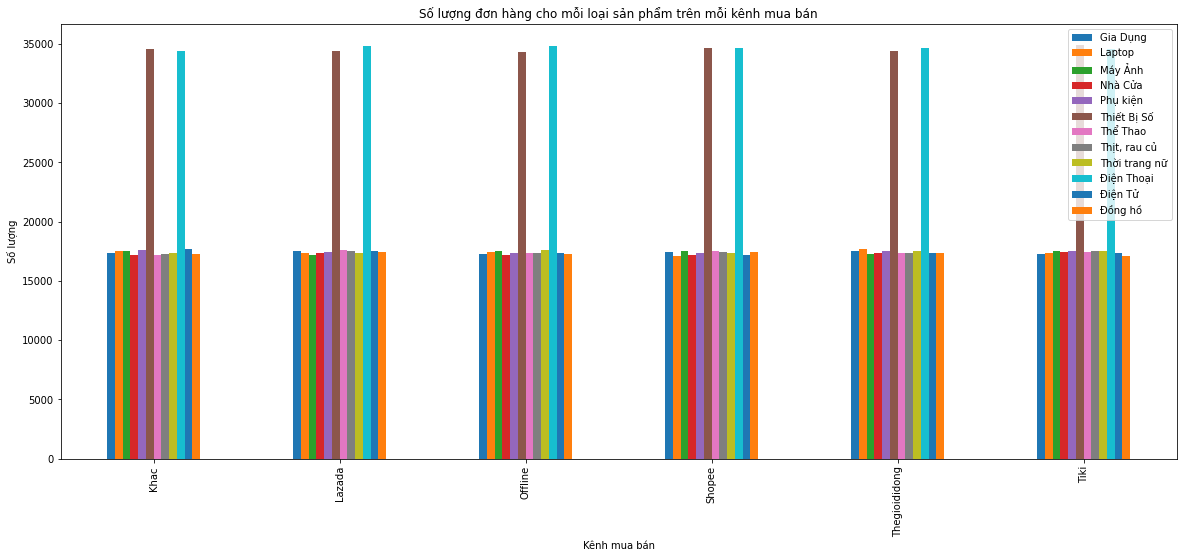

In [16]:
sp_kenh_count.pivot(index='kenh_mua_ban', columns='loai_san_pham', values='soluong').plot(kind='bar', figsize=(20, 8))

plt.xlabel('Kênh mua bán')
plt.ylabel('Số lượng')
plt.title('Số lượng đơn hàng cho mỗi loại sản phẩm trên mỗi kênh mua bán')
plt.legend(loc='upper right')
plt.show()

#### 3.1.6. Tạo ra dataframe doanhthu_kenh_nam_df chỉ lấy kenh_mua_ban, nam và so_tien_thanh_toan

In [17]:
doanhthu_kenh_nam_df = sub_df[['kenh_mua_ban', 'nam', 'so_tien_thanh_toan']]
doanhthu_kenh_nam_df

,kenh_mua_ban,nam,so_tien_thanh_toan
0,Lazada,2014,7951000
1,Offline,2018,6057000
2,Thegioididong,2019,415000
3,Shopee,2015,6033000
4,Shopee,2020,2118000
...,...,...,...
1458363,Tiki,2014,8011000
1458364,Lazada,2015,4143000
1458365,Lazada,2014,4515000
1458366,Tiki,2017,7215000


#### 3.1.7. Tổng doanh thu từng kênh mua bán qua các năm

In [18]:
doanhthu_kenh_nam_sum = doanhthu_kenh_nam_df.groupby(by=['nam', 'kenh_mua_ban']).sum().sort_values(by=['kenh_mua_ban', 'nam'], ascending=True).reset_index()
doanhthu_kenh_nam_sum

,nam,kenh_mua_ban,so_tien_thanh_toan
0,2014,Khac,176216262000
1,2015,Khac,174897946000
2,2016,Khac,177747448000
3,2017,Khac,176354446000
4,2018,Khac,176191513000
5,2019,Khac,175810958000
6,2020,Khac,177704001000
7,2021,Khac,83052000
8,2014,Lazada,176117305000
9,2015,Lazada,177440939000


#### 3.1.8. Loại bỏ doanh thu năm 2021

In [19]:
nam_2021 = doanhthu_kenh_nam_sum[ doanhthu_kenh_nam_sum['nam'] == 2021 ].index
doanhthu_kenh_nam_sum.drop(nam_2021, inplace = True)
doanhthu_kenh_nam_sum = doanhthu_kenh_nam_sum.reset_index(drop=True)
doanhthu_kenh_nam_sum

,nam,kenh_mua_ban,so_tien_thanh_toan
0,2014,Khac,176216262000
1,2015,Khac,174897946000
2,2016,Khac,177747448000
3,2017,Khac,176354446000
4,2018,Khac,176191513000
5,2019,Khac,175810958000
6,2020,Khac,177704001000
7,2014,Lazada,176117305000
8,2015,Lazada,177440939000
9,2016,Lazada,177949106000


#### 3.1.9. Sơ đồ trực quan hóa Tổng doanh thu mỗi năm trên từng kênh mua bán

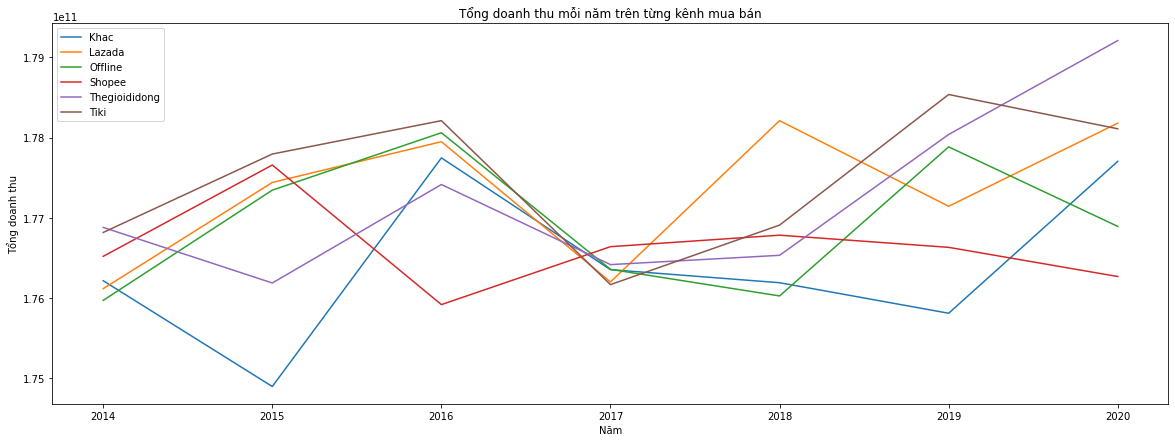

In [20]:
doanhthu_kenh_nam_sum.pivot(index='nam', columns='kenh_mua_ban', values='so_tien_thanh_toan').plot(figsize=(20, 7))

plt.xlabel('Năm')
plt.ylabel('Tổng doanh thu')
plt.title('Tổng doanh thu mỗi năm trên từng kênh mua bán')
plt.legend(loc='upper left')
plt.show()

#### Kết luận
<ul>
    <li>Số lượng đơn hàng từng sản phẩm không có sự khác biệt quá lớn trừ sản phẩm Điện Thoại và Thiết bị số.</li><br>
    <li>Số lượng sản phẩm bán ra trên các kênh mua bán khác nhau không có sự khác biệt quá lớn.</li><br>
    <li>Doanh thu mỗi năm của từng kênh mua bán đang có xu hướng như sau (2019 - 2020):
        <ul>
            <li>Khác: tăng</li>
            <li>Lazada: tăng</li>
            <li>Thegioididong: tăng</li>
            <li>Offiline: giảm</li>
            <li>Shopee: giảm</li>   
            <li>Tiki: giảm</li>
        </ul>
    </li>
</ul>

--------------------------------------------------------------------------------------------------------------------------------

### 3.2. Chiến lược 2: Khai thác thuộc tính tinh_thanhpho, nam trên kenh_mua_ban = 'Offline'
Mục đích là để xem xét doanh thu bán hàng offline tại các tỉnh / thành phố như thế nào qua các năm.<br>

#### 3.2.1. Lọc dataframe chỉ lấy những đơn hàng bán offline

In [21]:
offline_only_df = sub_df.loc[sub_df['kenh_mua_ban'] == 'Offline']
offline_only_df

,tinh_thanhpho,loai_san_pham,thoi_gian,so_tien_thanh_toan,kenh_mua_ban,do_uu_tien,tien_ship,can_nang,chieu_cao,chieu_dai,chieu_rong,nam
1,Bình Định,Thời trang nữ,03/23/2018 11:10 PM,6057000,Offline,Thấp,128000,10.074268,5.352235,4.134053,3.961462,2018
5,Tiền Giang,Thiết Bị Số,04/28/2017 06:51 PM,7389000,Offline,Trung bình,87000,1.083499,3.933194,2.551464,1.611047,2017
7,Hải Dương,Thiết Bị Số,03/06/2018 01:55 PM,9410000,Offline,Thấp,38000,6.358646,2.741359,1.407538,5.476155,2018
11,Tiền Giang,Nhà Cửa,06/29/2020 10:13 AM,8467000,Offline,Cao,105000,7.265484,4.685154,1.547837,0.986665,2020
14,Tiền Giang,Thời trang nữ,10/02/2015 09:04 AM,8509000,Offline,Trung bình,91000,4.355682,1.282714,1.425278,5.206367,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1458334,Gia Lai,Thiết Bị Số,04/10/2019 09:16 PM,313000,Offline,Thấp,168000,4.933037,1.838950,1.239286,2.111614,2019
1458335,Tiền Giang,Máy Ảnh,09/04/2019 04:44 PM,1376000,Offline,Trung bình,12000,3.475162,4.127707,4.106901,2.042502,2019
1458341,Hà Giang,Thời trang nữ,02/09/2014 10:48 PM,1049000,Offline,Thấp,24000,6.586315,4.778427,4.345852,2.434251,2014
1458349,Hồ Chí Minh,Thiết Bị Số,06/28/2020 02:01 AM,9745000,Offline,Trung bình,90000,1.343132,2.227526,2.712173,5.147171,2020


#### 3.2.2. Tạo ra dataframe doanhthu_tp_nam_df chỉ lấy tinh_thanhpho, nam, kenh_mua_ban và so_tien_thanh_toan

In [22]:
doanhthu_tp_nam_df = offline_only_df[['tinh_thanhpho', 'nam', 'kenh_mua_ban', 'so_tien_thanh_toan']]
doanhthu_tp_nam_df

,tinh_thanhpho,nam,kenh_mua_ban,so_tien_thanh_toan
1,Bình Định,2018,Offline,6057000
5,Tiền Giang,2017,Offline,7389000
7,Hải Dương,2018,Offline,9410000
11,Tiền Giang,2020,Offline,8467000
14,Tiền Giang,2015,Offline,8509000
...,...,...,...,...
1458334,Gia Lai,2019,Offline,313000
1458335,Tiền Giang,2019,Offline,1376000
1458341,Hà Giang,2014,Offline,1049000
1458349,Hồ Chí Minh,2020,Offline,9745000


#### 3.2.3. Tổng doanh thu bán offline từng tỉnh / thành phố qua các năm

In [23]:
doanhthu_tp_nam_sum = doanhthu_tp_nam_df.groupby(by=['kenh_mua_ban', 'nam', 'tinh_thanhpho']).sum().sort_values(by=['nam'], ascending=True).reset_index()
doanhthu_tp_nam_sum

,kenh_mua_ban,nam,tinh_thanhpho,so_tien_thanh_toan
0,Offline,2014,Bình Thuận,10917039000
1,Offline,2014,Đồng Nai,10518814000
2,Offline,2014,Đà Nẵng,10562066000
3,Offline,2014,Tiền Giang,10357927000
4,Offline,2014,Thừa Thiên Huế,9966687000
5,Offline,2014,Sóc Trăng,10608980000
6,Offline,2014,Quảng Ninh,10010738000
7,Offline,2014,Phú Yên,10295898000
8,Offline,2014,Thái Nguyên,10163583000
9,Offline,2014,Hồ Chí Minh,10030136000


#### 3.2.4. Loại bỏ doanh thu năm 2021

In [24]:
nam_2021 = doanhthu_tp_nam_sum[ doanhthu_tp_nam_sum['nam'] == 2021 ].index
doanhthu_tp_nam_sum.drop(nam_2021, inplace = True)
doanhthu_tp_nam_sum = doanhthu_tp_nam_sum.reset_index(drop=True)
doanhthu_tp_nam_sum

,kenh_mua_ban,nam,tinh_thanhpho,so_tien_thanh_toan
0,Offline,2014,Bình Thuận,10917039000
1,Offline,2014,Đồng Nai,10518814000
2,Offline,2014,Đà Nẵng,10562066000
3,Offline,2014,Tiền Giang,10357927000
4,Offline,2014,Thừa Thiên Huế,9966687000
5,Offline,2014,Sóc Trăng,10608980000
6,Offline,2014,Quảng Ninh,10010738000
7,Offline,2014,Phú Yên,10295898000
8,Offline,2014,Thái Nguyên,10163583000
9,Offline,2014,Hồ Chí Minh,10030136000


#### 3.2.5. Sơ đồ trực quan hóa Tổng doanh thu mua bán Offline ở từng tỉnh/thành phố mỗi năm

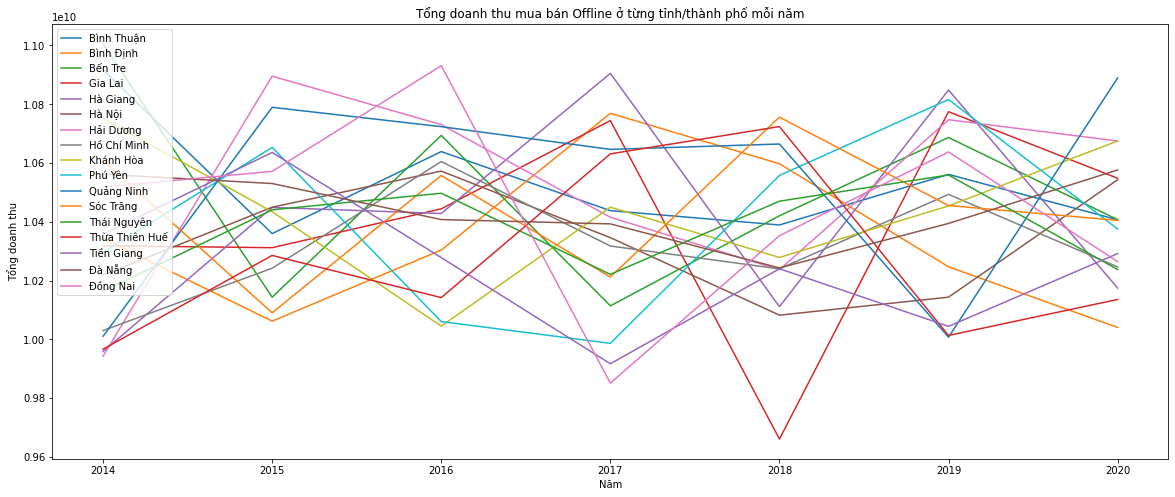

In [25]:
doanhthu_tp_nam_sum.pivot(index='nam', columns='tinh_thanhpho', values='so_tien_thanh_toan').plot(figsize=(20, 8))

plt.xlabel('Năm')
plt.ylabel('Tổng doanh thu')
plt.title('Tổng doanh thu mua bán Offline ở từng tỉnh/thành phố mỗi năm') 
plt.legend(loc='upper left')
plt.show()

In [26]:
nam_2019_2020 = doanhthu_tp_nam_sum.loc[doanhthu_tp_nam_sum['nam'].isin([2019,2020])].sort_values(by=['tinh_thanhpho','nam'])
nam_2019_2020

,kenh_mua_ban,nam,tinh_thanhpho,so_tien_thanh_toan
100,Offline,2019,Bình Thuận,10561390000
117,Offline,2020,Bình Thuận,10406886000
99,Offline,2019,Bình Định,10246872000
116,Offline,2020,Bình Định,10040522000
98,Offline,2019,Bến Tre,10686824000
115,Offline,2020,Bến Tre,10407350000
97,Offline,2019,Gia Lai,10774601000
114,Offline,2020,Gia Lai,10548155000
96,Offline,2019,Hà Giang,10848437000
113,Offline,2020,Hà Giang,10174644000


#### Kết luận
<ul>
    <li>Doanh thu bán offline giữa các tỉnh có sự khác biệt về xu hướng tăng giảm</li><br>
    <li>Giai đoạn 2019-2020, các tỉnh có doanh thu tăng rõ rệt bao gồm:
        <ul>
            <li>Quảng Ninh</li>
            <li>Khánh Hòa</li>
            <li>Hà Nội</li>
            <li>Đà Nẵng</li>
            <li>Tiền Giang</li>
            <li>Thừa Thiên Huế</li>
        </ul>
    </li>
    <li>Giai đoạn 2019-2020, các tỉnh có doanh thu giảm bao gồm:
        <ul>
            <li>Bình Định</li>
            <li>Hải Dương</li>
            <li>Bình Thuận</li>
            <li>Hà Giang</li>
            <li>Gia Lai</li>
            <li>Bến Tre</li>
            <li>Sóc Trăng</li>
            <li>Đồng Nai</li>
            <li>Hồ Chí Minh</li>
            <li>Thái Nguyên</li>
            <li>Phú Yên</li>
        </ul>
    </li>
</ul>